In [1]:
import numpy as np
import sqlite3 
import matplotlib.pylab as plt
%matplotlib inline
import pandas as pd

In [23]:
con = sqlite3.connect("baseline_v4.1_10yrs.db")
data = pd.read_sql("select rotTelPos,filter,scheduler_note,night,fieldRA,fieldDec,rotSkyPos,observationStartMJD,rotSkyPos_desired,rotTelPos_backup from observations where night < 366;", con)
con.close()

In [24]:
ack = data['rotTelPos'].values[1:] - data['rotTelPos'].values[0:-1]

In [25]:
sf = np.where( (data["filter"].values[1:] == data["filter"].values[0:-1]) &
              ((data["scheduler_note"].values[1:] == data["scheduler_note"].values[0:-1])))

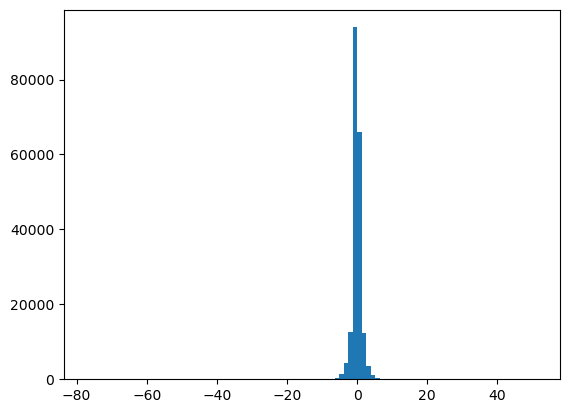

In [26]:
_temp = plt.hist(ack[sf], bins=100)

In [27]:
ack[sf].min()

-77.14581791523307

In [28]:
np.where(np.abs(ack[sf]) > 20.)[0].size

134

In [29]:
np.where(np.abs(ack[sf]) > 30.)[0]

array([  2584,   2634,  18429,  18867,  18869,  35028,  35128,  35129,
        35463,  35464,  35469,  38928,  38929,  50036,  69083,  70056,
        73938,  79612,  83867,  87993,  87994,  99086,  99178,  99180,
        99181,  99182,  99183,  99185, 115513, 115523, 119760, 119783,
       119784, 119786, 129873, 138536, 140181, 147256, 147370, 147376,
       147377, 165771, 170567, 180550, 180552, 181470, 181520, 193860])

In [30]:
data["night"].values[sf[0][2584]]

3

In [31]:
in_night = np.where(data["night"] == 3)[0]

In [32]:
np.abs(np.diff(data["rotTelPos"].values[in_night])).max()

66.7109291057556

In [33]:
np.where(np.abs(np.diff(data["rotTelPos"].values[in_night])) > 30)

(array([305, 356]),)

In [34]:
data.iloc[in_night[304]]

rotTelPos                   50.527567
filter                              g
scheduler_note         pair_33, gr, a
night                               3
fieldRA                    188.023306
fieldDec                   -46.822055
rotSkyPos                  -140.66892
observationStartMJD      60799.102307
rotSkyPos_desired          -140.66892
rotTelPos_backup            31.578885
Name: 2651, dtype: object

In [35]:
data.iloc[in_night[305]]

rotTelPos                   52.730869
filter                              g
scheduler_note         pair_33, gr, a
night                               3
fieldRA                    184.327112
fieldDec                   -45.650975
rotSkyPos                  -130.54784
observationStartMJD       60799.10277
rotSkyPos_desired          -130.54784
rotTelPos_backup            31.578885
Name: 2652, dtype: object

In [36]:
data.iloc[in_night[306]]

rotTelPos                   19.180149
filter                              g
scheduler_note         pair_33, gr, a
night                               3
fieldRA                      169.9382
fieldDec                   -18.058885
rotSkyPos                   19.652891
observationStartMJD       60799.10401
rotSkyPos_desired           19.652891
rotTelPos_backup            31.578885
Name: 2653, dtype: object

In [37]:
data.iloc[in_night[307]]

rotTelPos                   16.573462
filter                              g
scheduler_note         pair_33, gr, a
night                               3
fieldRA                    172.320833
fieldDec                   -16.432654
rotSkyPos                   28.611038
observationStartMJD      60799.104461
rotSkyPos_desired           28.611038
rotTelPos_backup            31.578885
Name: 2654, dtype: object

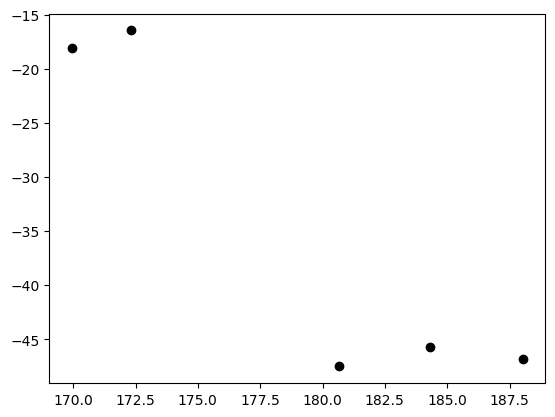

In [38]:
indx = in_night[np.arange(303,308,1)]
plt.plot(data["fieldRA"].values[indx], data["fieldDec"].values[indx], 'ko')

In [39]:
np.diff(data["observationStartMJD"].values[indx])*24*3600

array([ 44.31544247,  40.03601675, 107.1180772 ,  38.95493166])

In [40]:
data["rotSkyPos_desired"].values[indx]

array([-118.93126147, -140.66891998, -130.5478396 ,   19.65289088,
         28.61103776])

In [41]:
data["rotSkyPos"].values[indx]

array([-118.93126147, -140.66891998, -130.5478396 ,   19.65289088,
         28.61103776])

In [42]:
data["rotTelPos"].values[indx]

array([49.04424753, 50.52756676, 52.73086906, 19.18014929, 16.57346214])

In [22]:
data["rotTelPos_backup"].values[indx]

array([31.57888465, 31.57888465, 31.57888465, 31.57888465, 31.57888465])